In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Preliminary data analysis

In [5]:
# load data
df = pd.read_csv('qatar2022_tweets.csv')
#df = df.loc[0:999]

In [6]:
df.head()

,id,created_at,text,username
0,1637908592727654406,2023-03-20 20:06:54+00:00,#FIFA talks a good game but its actions show i...,ChristineJameis
1,1637907531396943872,2023-03-20 20:02:40+00:00,Don't miss out any favorite sports game.\n\n🔴L...,justano23327712
2,1637906995205361665,2023-03-20 20:00:33+00:00,A miracle journey...\n\nWhen someone tells you...,AlchDigi
3,1637904285928390658,2023-03-20 19:49:47+00:00,Take over #Qatar with our \n🔥 #WorldCup2022 St...,IvannaMcconnell
4,1637902385182851072,2023-03-20 19:42:14+00:00,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,Methodsbio012


In [7]:
df.shape

(26038, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26038 entries, 0 to 26037
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26038 non-null  int64 
 1   created_at  26038 non-null  object
 2   text        26038 non-null  object
 3   username    26038 non-null  object
dtypes: int64(1), object(3)
memory usage: 813.8+ KB


In [9]:
df.isna().sum()

id            0
created_at    0
text          0
username      0
dtype: int64

#### no missing values

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['Date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time


In [11]:
df.drop(columns=['created_at'],axis=1,inplace = True)

In [12]:
# only interested in text part. so drop other columns. 
df.drop(columns=['id','username'],axis=1,inplace=True)

In [13]:
df.head()

,text,Date,time
0,#FIFA talks a good game but its actions show i...,2023-03-20,20:06:54
1,Don't miss out any favorite sports game.\n\n🔴L...,2023-03-20,20:02:40
2,A miracle journey...\n\nWhen someone tells you...,2023-03-20,20:00:33
3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,2023-03-20,19:49:47
4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,2023-03-20,19:42:14


#### Data Preprocessing

In [14]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
# function to preprocess tweets
def preprocess_tweet(tweet, lemmatizer=True):
    # initialize tweet tokenizer
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

    tweet = tweet.split(': ')[-1]
    # tokenize tweet into individual words
    tweet_tokens = tokenizer.tokenize(tweet)

    # remove stopwords and punctuations
    stop_words = set(stopwords.words('english'))
    tweet_filtered = [word for word in tweet_tokens if not word in stop_words and word.isalpha()]

    if lemmatizer:
      lemmatizer = WordNetLemmatizer()
      tweet_lemmatized = [lemmatizer.lemmatize(word) for word in tweet_filtered]

      # join tokens back into a string
      tweet_cleaned = ' '.join(tweet_lemmatized)

    # join tokens back into a string
    else:
        tweet_cleaned = ' '.join(tweet_filtered)

    return tweet_cleaned



In [16]:
#convert to numpy 
raw_tweets = df['text'].values

# applying cleaning process to all raw data

clean_tweets = [preprocess_tweet(tweet) for tweet in raw_tweets]

# add new column called "cleaned_tweet"

df['clean_tweets'] = clean_tweets

In [17]:
df.head()

,text,Date,time,clean_tweets
0,#FIFA talks a good game but its actions show i...,2023-03-20,20:06:54,talk good game action show trusted failed prot...
1,Don't miss out any favorite sports game.\n\n🔴L...,2023-03-20,20:02:40,miss favorite sport game live stream joyful iptv
2,A miracle journey...\n\nWhen someone tells you...,2023-03-20,20:00:33,miracle journey someone tell go world cup u jo...
3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,2023-03-20,19:49:47,november
4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,2023-03-20,19:42:14,fund lol tapin cashapp deal bro lol


#### Visualization

In [18]:
from PIL import Image
import urllib.request
import seaborn as sn

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


##### most used words and phrases

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objects as go
from plotly.offline import iplot

import cufflinks # for link with Plotly
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True,theme='pearl')

In [21]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [22]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sn



In [23]:
def get_top_n_gram(corpus,ngram_range,n=None):
    #stop_words = list(stopwords.words('english'))
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=list(stopwords.words('english'))).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [24]:
fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )

In [25]:


unigrams = get_top_n_gram(df['clean_tweets'],(1,1),10)
bigrams = get_top_n_gram(df['clean_tweets'],(2,2),10)

gender_1 = pd.DataFrame(unigrams, columns = ['Text' , 'count'])
gender_1 = gender_1.groupby('Text').sum()['count'].sort_values(ascending=True)

gender_2 = pd.DataFrame(bigrams, columns = ['Text' , 'count'])
gender_2 = gender_2.groupby('Text').sum()['count'].sort_values(ascending=True)

fig = make_subplots(rows=1, cols=2, subplot_titles=("Top 10 Unigrams", "Top 10 Bigrams"))

fig.add_trace(
    go.Bar(x=gender_1.values, y=gender_1.index, orientation='h'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=gender_2.values, y=gender_2.index, orientation='h'),
    row=1, col=2
)

fig.update_layout(height=600, width=1200, title_text="Top 10 Unigrams and Bigrams")

fig.show(renderer="colab")


In [26]:
'''
The provided plot displays the top 10 unigrams and bigrams with their respective frequency counts.
The unigrams indicate the most commonly used individual words in the given dataset. 
The top five unigrams are 'November', 'Cup', 'World', 'Sisu', and 'Network', with 'November' being the most frequent, appearing 4106 times. 
The remaining five words are 'Quests', 'Win', 'Join', 'Coming', and 'Qatar.'
On the other hand, the bigrams indicate the most common pairs of adjacent words used in the dataset. The top five bigrams are 'World Cup', 
'Sisu Network', 'Network Updates', 'Updates Quests', and 'Quests Following', each appearing 1507 times. The remaining bigrams are 'Following 
Quests', 'Quests Daily', 'Daily Connect', 'Connect Sisu', and 'Network YouTube.'
 '''

"\nThe provided plot displays the top 10 unigrams and bigrams with their respective frequency counts.\nThe unigrams indicate the most commonly used individual words in the given dataset. \nThe top five unigrams are 'November', 'Cup', 'World', 'Sisu', and 'Network', with 'November' being the most frequent, appearing 4106 times. \nThe remaining five words are 'Quests', 'Win', 'Join', 'Coming', and 'Qatar.'\nOn the other hand, the bigrams indicate the most common pairs of adjacent words used in the dataset. The top five bigrams are 'World Cup', \n'Sisu Network', 'Network Updates', 'Updates Quests', and 'Quests Following', each appearing 1507 times. The remaining bigrams are 'Following \nQuests', 'Quests Daily', 'Daily Connect', 'Connect Sisu', and 'Network YouTube.'\n "

In [27]:
normalized = " ".join(word for word in df.clean_tweets)

In [28]:
count = {}
for w in normalized.split():
    if w in count:
        count[w] += 1
    else:
        count[w] = 1


In [29]:
keys = list(count.keys())[:10]
values = list(count.values())[:10]

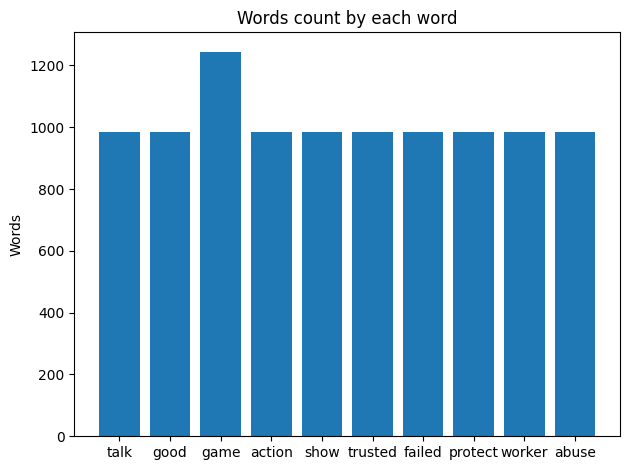

In [30]:
x_pos = np.arange(len(keys))
plt.bar(x_pos, values, align='center')
plt.xticks(x_pos, keys)
plt.ylabel('Words')
plt.title('Words count by each word')
plt.tight_layout()
plt.show()

In [31]:
df['num_words_st'] = df['clean_tweets'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
df['num_word_text'] = df['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
df['difference_in_words'] = df['num_word_text'] - df['num_words_st'] #Difference in Number of words text and Selected Tex

In [32]:
df.head(3)

,text,Date,time,clean_tweets,num_words_st,num_word_text,difference_in_words
0,#FIFA talks a good game but its actions show i...,2023-03-20,20:06:54,talk good game action show trusted failed prot...,18,47,29
1,Don't miss out any favorite sports game.\n\n🔴L...,2023-03-20,20:02:40,miss favorite sport game live stream joyful iptv,8,30,22
2,A miracle journey...\n\nWhen someone tells you...,2023-03-20,20:00:33,miracle journey someone tell go world cup u jo...,20,48,28


In [33]:
import plotly.express as px
import plotly.figure_factory as ff

In [34]:
hist_data = [df['num_words_st'],df['num_word_text']]

group_labels = ['clean_tweets', 'text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show(renderer="colab")

Text(0.5, 0, 'Distributions')

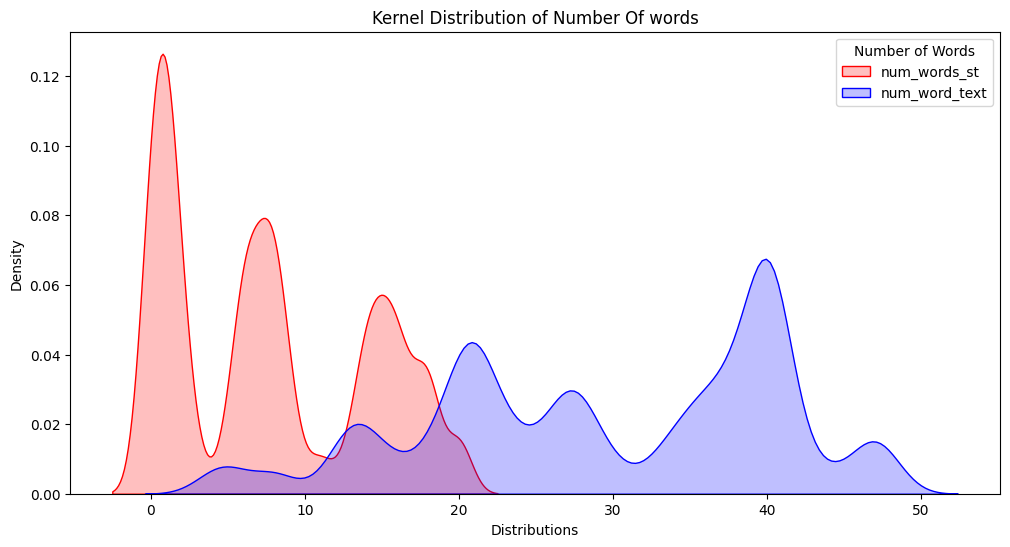

In [35]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(df['num_words_st'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p2=sns.kdeplot(df['num_word_text'], shade=True, color="b")
plt.legend(title='Number of Words', loc='upper right', labels=['num_words_st', 'num_word_text'])
plt.xlabel('Distributions')

In [36]:
# Convert tweets to lowercase
df['clean_tweets'] = df['clean_tweets'].str.lower()

# Remove URLs
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove mentions
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub(r'@\S+', '', x))

# Remove hashtags
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: re.sub(r'#\S+', '', x))

# Remove punctuation
df['clean_tweets'] = df['clean_tweets'].str.replace('[^\w\s]','')

# Remove stopwords
stop = stopwords.words('english')
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

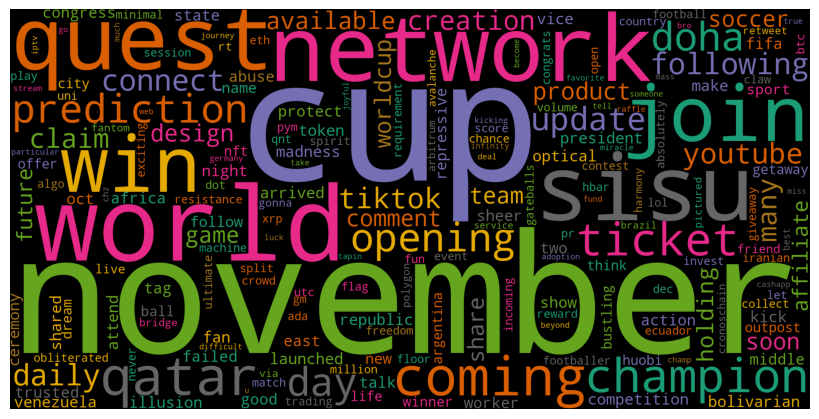

In [37]:
wordcloud = WordCloud(background_color='black',colormap="Dark2",collocations=False,
                              width=2000,height=1000, min_font_size = 10).generate(' '.join(df['clean_tweets']))

# Display the word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [38]:
#cleaning the twitter data again for better results

# clean and preprocess the tweets
stop_words = set(stopwords.words('english'))
def preprocess_tweet_text(tweet):
    tweet = re.sub(r"http\S+", "", tweet)  # remove URLs
    tweet = re.sub(r'\W', ' ', tweet)  # remove special characters
    tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', tweet)  # remove single characters
    tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', tweet)  # remove single characters from the start
    tweet = re.sub(r'\s+', ' ', tweet, flags=re.I)  # replace multiple spaces with single space
    tweet = tweet.lower()  # convert text to lowercase
    tweet_tokens = tweet.split()  # tokenize the text
    tweet_tokens = [token for token in tweet_tokens if not token in stop_words]  # remove stop words
    preprocessed_tweet = ' '.join(tweet_tokens)
    return preprocessed_tweet

In [39]:
df['clean_tweets'] = df['clean_tweets'].apply(preprocess_tweet)

In [40]:
df.head()

,text,Date,time,clean_tweets,num_words_st,num_word_text,difference_in_words
0,#FIFA talks a good game but its actions show i...,2023-03-20,20:06:54,talk good game action show trusted failed prot...,18,47,29
1,Don't miss out any favorite sports game.\n\n🔴L...,2023-03-20,20:02:40,miss favorite sport game live stream joyful iptv,8,30,22
2,A miracle journey...\n\nWhen someone tells you...,2023-03-20,20:00:33,miracle journey someone tell go world cup u jo...,20,48,28
3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,2023-03-20,19:49:47,november,1,40,39
4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,2023-03-20,19:42:14,fund lol tapin cashapp deal bro lol,7,14,7


In [41]:
# getting the overall sentiment of tweets using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [43]:
def get_sentiment(tweet):
    '''
    for positive =1, negative = -1 , neutral= 0
    '''
    sentiment = analyzer.polarity_scores(tweet)
    tweet_sentiment ='neutral'
    if sentiment['compound'] >= 0.05:
        return 1 
    if sentiment['compound']<= 0.05:
        return -1
    else:
        return 0

In [44]:
df['sentiment_output'] = df['clean_tweets'].apply(lambda x : get_sentiment(x))

In [45]:
df.head()

,text,Date,time,clean_tweets,num_words_st,num_word_text,difference_in_words,sentiment_output
0,#FIFA talks a good game but its actions show i...,2023-03-20,20:06:54,talk good game action show trusted failed prot...,18,47,29,-1
1,Don't miss out any favorite sports game.\n\n🔴L...,2023-03-20,20:02:40,miss favorite sport game live stream joyful iptv,8,30,22,1
2,A miracle journey...\n\nWhen someone tells you...,2023-03-20,20:00:33,miracle journey someone tell go world cup u jo...,20,48,28,1
3,Take over #Qatar with our \n🔥 #WorldCup2022 St...,2023-03-20,19:49:47,november,1,40,39,-1
4,#Dollar #Cashapp #WorldCup2022 funds lol 😂 tap...,2023-03-20,19:42:14,fund lol tapin cashapp deal bro lol,7,14,7,1


In [46]:
col = ['clean_tweets','sentiment_output']
df_ml = df.loc[:,col]

In [47]:
df_ml.head()

,clean_tweets,sentiment_output
0,talk good game action show trusted failed prot...,-1
1,miss favorite sport game live stream joyful iptv,1
2,miracle journey someone tell go world cup u jo...,1
3,november,-1
4,fund lol tapin cashapp deal bro lol,1


#### ML

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [63]:
X = df_ml['clean_tweets']

In [64]:
y = df_ml.iloc[:,1]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ve

In [60]:
def plotMetrics(accuracy_param, precision_param, recall_param,
                f1_score_param, confusion_matrix_param, title=''):

    # Plot evaluation metrics
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
    values = [accuracy_param, precision_param, recall_param, f1_score_param]

    # begin plot
    plt.figure(figsize=(8,5))
    plt.bar(metrics, values, color=['red', 'blue', 'green', 'purple'])
    plt.title(f'{title} Evaluation Metrics')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    for i, v in enumerate(values):
        plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
    plt.show()

    print()
    print()

    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    plt.imshow(confusion_matrix_param, cmap=plt.cm.Blues)

    for i in range(len(confusion_matrix_param)):
        for j in range(len(confusion_matrix_param)):
            plt.text(j, i, confusion_matrix_param[i][j], ha='center', va='center')

    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0,1, 2], ['neutral', 'positive', 'negative'])
    plt.yticks([0,1, 2], ['neutral', 'positive', 'negative'])
    plt.show()


In [61]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_score_nb = nb.predict_proba(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_score_nb = f1_score(y_test, y_pred_nb, average='weighted')
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

In [62]:
print('--Naive Bayes--\n')
print('Accuracy:', accuracy_nb)
print('\nPrecision:', precision_nb)
print('\nRecall:', recall_nb)
print('\nF1 score:', f1_score_nb)
# print('\nAUC:', roc_auc_nb)
print('\nConfusion matrix:\n', confusion_matrix_nb)


--Naive Bayes--

Accuracy: 1.0

Precision: 1.0

Recall: 1.0

F1 score: 1.0

Confusion matrix:
 [[2937    0]
 [   0 2271]]


In [178]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [179]:
# Create a classifier: a support vector classifier
svm = SVC(gamma=0.001, probability=True)

# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_score_svm = svm.predict_proba(X_test)

KeyboardInterrupt: 

In [ ]:

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_score_svm = f1_score(y_test, y_pred_svm, average='weighted')
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
